Explore the global terms counts generated by Jared.
The aim is to define a suitable cut-off frequency which will decide whether a word belongs to the vocabulary or not.


In [102]:
import numpy as np
import pylab as plt
import os,sys
import pandas as pd
import glob
from scipy.stats import pearsonr

%matplotlib inline  
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
path_data = os.path.abspath(  os.path.join(os.pardir,'output','by-cat_wos')  )
print(path_data)

/home/visitors/gerlach/Desktop/Projects/wos-jared/wos-text-dynamics/output/by-cat_wos


In [3]:
def get_timeseries_cat(filename):
    with open(filename) as f:
        x=f.readlines()
    list_ts = []
    for x_tmp in x:
        ts_tmp = np.array(x_tmp.split()[-1].split(',')).astype('float')
        list_ts += [ts_tmp]
    return list_ts

# Which categories survived the analysis

In [4]:
list_cat = []
for filename in glob.glob( os.path.join( path_data,'results_1_*' )  ):
    cat = filename.split('results_1_')[-1]
    list_cat += [cat]
list_cat.sort()

In [5]:
list_cat

['Acoustics',
 'Agricultural Engineering',
 'Agriculture, Dairy & Animal Science',
 'Agriculture, Multidisciplinary',
 'Agronomy',
 'Allergy',
 'Anatomy & Morphology',
 'Andrology',
 'Anesthesiology',
 'Anthropology',
 'Archaeology',
 'Area Studies',
 'Astronomy & Astrophysics',
 'Audiology & Speech-Language Pathology',
 'Automation & Control Systems',
 'Behavioral Sciences',
 'Biochemical Research Methods',
 'Biochemistry & Molecular Biology',
 'Biodiversity Conservation',
 'Biology',
 'Biophysics',
 'Biotechnology & Applied Microbiology',
 'Business',
 'Business, Finance',
 'Cardiac & Cardiovascular Systems',
 'Cell & Tissue Engineering',
 'Cell Biology',
 'Chemistry, Analytical',
 'Chemistry, Applied',
 'Chemistry, Inorganic & Nuclear',
 'Chemistry, Medicinal',
 'Chemistry, Multidisciplinary',
 'Chemistry, Organic',
 'Chemistry, Physical',
 'Clinical Neurology',
 'Communication',
 'Computer Science, Artificial Intelligence',
 'Computer Science, Cybernetics',
 'Computer Science, Hard

In [80]:
## geting number of publications
path_ = os.path.join(os.pardir,os.pardir,'wos-text-dynamics-secondary','data')
fname_ = 'cat_pubs_by_year.pkl'
filename = os.path.join(path_,fname_)
df = pd.read_pickle(filename)
df

,Acoustics,Agricultural Economics & Policy,Agricultural Engineering,"Agriculture, Dairy & Animal Science","Agriculture, Multidisciplinary",Agronomy,Allergy,Anatomy & Morphology,Andrology,Anesthesiology,...,Transportation Science & Technology,Tropical Medicine,Urban Studies,Urology & Nephrology,Veterinary Sciences,Virology,Water Resources,Women's Studies,Zoology,ALL
1991,2432.0,915.0,777.0,4315.0,2687.0,6168.0,1613.0,1331.0,252.0,3758.0,...,532.0,1825.0,976.0,6190.0,9970.0,3920.0,3741.0,702.0,8683.0,901808
1992,2413.0,535.0,762.0,3857.0,2712.0,5365.0,2562.0,1454.0,253.0,3966.0,...,461.0,2003.0,844.0,7055.0,10208.0,4441.0,3923.0,769.0,7777.0,922010
1993,2537.0,942.0,750.0,3943.0,2428.0,5265.0,2826.0,1428.0,241.0,6457.0,...,487.0,1671.0,1053.0,7219.0,10563.0,4174.0,3907.0,922.0,7930.0,963477
1994,3117.0,980.0,762.0,3799.0,2703.0,5245.0,2957.0,1300.0,283.0,6684.0,...,575.0,1714.0,1137.0,10643.0,10449.0,5036.0,4405.0,1288.0,7647.0,1015818
1995,3254.0,999.0,770.0,3761.0,2598.0,5593.0,3231.0,1369.0,278.0,6887.0,...,570.0,1548.0,1468.0,11947.0,10420.0,4873.0,4964.0,1475.0,7910.0,1080336
1996,3735.0,860.0,810.0,3855.0,2675.0,5508.0,3239.0,1429.0,278.0,7044.0,...,708.0,1506.0,1529.0,12490.0,11583.0,4569.0,4687.0,1526.0,7661.0,1130853
1997,3257.0,1005.0,712.0,4579.0,2964.0,5380.0,4368.0,1578.0,322.0,6963.0,...,803.0,1715.0,1709.0,12574.0,13524.0,4617.0,5114.0,1617.0,7516.0,1159929
1998,3391.0,905.0,815.0,4600.0,3166.0,4886.0,3398.0,1524.0,263.0,7573.0,...,884.0,1730.0,1687.0,10313.0,13828.0,5166.0,5332.0,1768.0,7936.0,1161957
1999,3110.0,1021.0,860.0,4406.0,3106.0,4881.0,3602.0,1370.0,284.0,8240.0,...,942.0,1754.0,1627.0,9805.0,13460.0,4552.0,5519.0,1756.0,8158.0,1187808
2000,3507.0,592.0,937.0,4780.0,3427.0,4924.0,3428.0,1457.0,398.0,7463.0,...,1714.0,1556.0,1649.0,9224.0,13776.0,5336.0,5516.0,1441.0,8356.0,1205276


# Example Plot

In [151]:

ind = list_cat.index('Biochemistry & Molecular Biology')
ind=0
cat = list_cat[ind]
print(cat)
filename = os.path.join( path_data, 'results_1_%s'%(cat) )
jsd_t_mu, jsd_t_std, jsd_tt_mu, jsd_tt_std = get_timeseries_cat(filename)
t = np.arange(len(jsd_t_mu))
tt = np.arange(len(jsd_tt_mu))

Acoustics


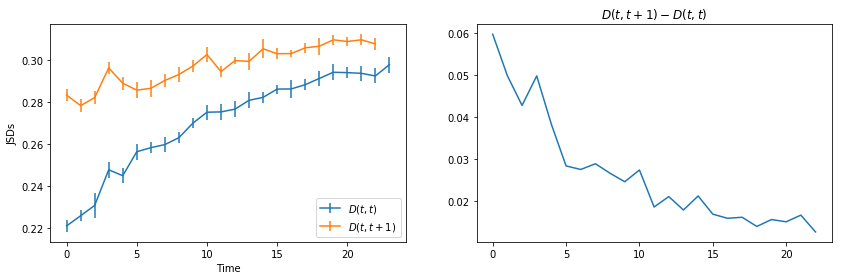

In [153]:
plt.figure(figsize=(14,4))

plt.subplot(121)
x = t
y = jsd_t_mu
yerr = jsd_t_std
plt.errorbar(x,y,yerr=yerr,label=r'$D(t,t)$')

x = tt
y = jsd_tt_mu
yerr = jsd_tt_std
plt.errorbar(x,y,yerr=yerr,label=r'$D(t,t+1)$')

plt.plot()

plt.legend(loc='lower right')

plt.xlabel('Time')
plt.ylabel('JSDs')

plt.subplot(122)
plt.title(r'$D(t,t+1) - D(t,t) $')
x = tt
y = 0.5*(jsd_t_mu[1:]+jsd_t_mu[:-1])
# plt.plot(x,y)

x = tt
y = jsd_tt_mu - 0.5*(jsd_t_mu[1:]+jsd_t_mu[:-1])
plt.plot(x,y)



(0.87163493351323584, 6.1171076631001413e-08)

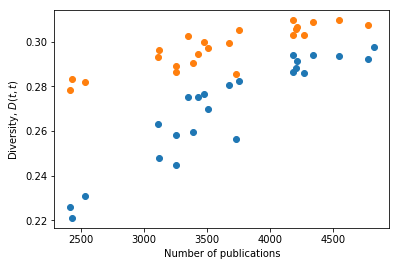

In [157]:
## relation between publications and D_t
num_pubs = df[cat].values[:-1]
plt.plot(num_pubs,jsd_t_mu,marker='o',lw=0)
plt.plot(num_pubs[:-1],jsd_tt_mu,marker='o',lw=0)

plt.xlabel('Number of publications')
plt.ylabel(r'Diversity, $D(t,t)$')
pearsonr(jsd_tt_mu,num_pubs[:-1])

In [111]:
list_D = []
list_size = []
for cat in list_cat:
    filename = os.path.join( path_data, 'results_1_%s'%(cat) )
    jsd_t_mu, jsd_t_std, jsd_tt_mu, jsd_tt_std = get_timeseries_cat(filename)
    num_pubs = df[cat].values[:-1]
    list_D += list(jsd_t_mu)
    list_size += list(num_pubs)
    print(pearsonr( jsd_t_mu,num_pubs  ))

(0.92347749970179327, 1.2703814443988591e-10)
(nan, 1.0)
(0.58034706826637261, 0.0029484970640882209)
(0.84998665774302218, 1.4653875317387134e-07)
(0.82356281092476835, 7.6646165578818916e-07)
(0.72474692084758319, 6.1873247036998532e-05)
(0.87200605534009545, 2.8457605437321631e-08)
(nan, 1.0)
(0.46545849313795518, 0.021899924297421207)
(nan, 1.0)
(nan, 1.0)
(nan, 1.0)
(0.95618263840523687, 3.2150267000512397e-13)
(0.87098424297728938, 3.0905310584691455e-08)
(nan, 1.0)
(0.7789323322965761, 7.323966778292423e-06)
(0.83914756774268395, 2.9931118133922774e-07)
(0.93662871148426308, 1.6984662905082775e-11)
(nan, 1.0)
(0.78666534880371974, 5.1475308064106996e-06)
(0.85414022213490293, 1.0980917968108686e-07)
(0.90222670469184174, 1.7011351649403692e-09)
(nan, 1.0)
(nan, 1.0)
(0.64567512811984096, 0.00065524499098832821)
(nan, 1.0)
(0.70986555283394193, 0.00010218923552751132)
(0.87109316503049838, 3.0635687952691963e-08)
(0.80359605246607146, 2.256768115119957e-06)
(0.89972755256591419, 

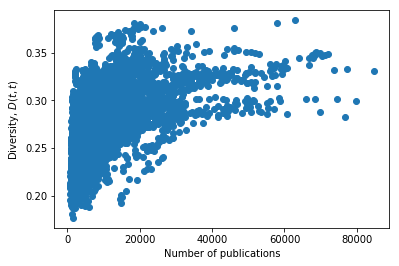

In [143]:
plt.plot(list_size,list_D,marker='o',lw=0)
plt.xlabel('Number of publications')
plt.ylabel(r'Diversity, $D(t,t)$')
# plt.xscale('log')
# plt.xlim(0,10000)
# plt.xlim(10000,100000)